In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
y = train['SalePrice']
data = pd.concat([train, test], ignore_index = True)
data.drop(['SalePrice'], axis = 1)
ids = test['Id']

In [3]:
pd.set_option('display.max_columns', None)

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape[0]

1460

In [5]:
data.shape[0]

2919

In [6]:
nans = pd.isnull(data).sum()
nans[nans>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [7]:
data = data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], 1)

In [8]:
data.dtypes.value_counts()

object     38
int64      25
float64    12
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

all_columns = data.columns.values
non_categorical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1","BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea","WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch","PoolArea", "MiscVal"]
categorical = [col for col in all_columns if col not in non_categorical]

In [10]:
from sklearn.impute import SimpleImputer


data = pd.get_dummies(data)

imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data = imp.fit_transform(data)

# Log transformation
data = np.log(data)
y = np.log(y)

data[data == -np.inf] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


To reduce number of features, use PCA. Use n_components = all columns and then select columns that makes up variance of 1.

In [11]:
pca = PCA(whiten = True)
pca.fit(data)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.22455681, 0.40250376, 0.52378858, 0.62357044, 0.69509569,
       0.75864202, 0.81080755, 0.85553153, 0.89080668, 0.92173551,
       0.94794766, 0.95737493, 0.9653729 , 0.97279608, 0.97870554,
       0.98400204, 0.9882473 , 0.99104835, 0.99293907, 0.99429974,
       0.9953963 , 0.99625964, 0.99702666, 0.99776727, 0.99844367,
       0.99895161, 0.99934191, 0.99960215, 0.99978305, 0.9998821 ,
       0.99994025, 0.99998604, 0.99999662, 0.99999872, 0.99999944,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [12]:
pca = PCA(n_components = 37, whiten = True)
pca_data = pca.fit_transform(data)

In [13]:
train = data[:1460, :]
test = data[1460:, :]

In [14]:
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


def r2_score_calc(train, y) :
    
    results = {}
    def test_model(clf) :
        cv = KFold(n_splits = 5, shuffle = True, random_state = 2020)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, y, cv = cv, scoring = r2)
        scores = [r2_val_score.mean()]
        return scores
    
    clf = linear_model.LinearRegression()
    results['linear'] = test_model(clf)
    
    clf = linear_model.Ridge()
    results['Ridge'] = test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results['Bayesian Ridge'] = test_model(clf)
    
    clf = linear_model.HuberRegressor(max_iter = 10000)
    results['Hubber'] = test_model(clf)
    
    clf = linear_model.Lasso(alpha = 1e-4)
    results['Lasso'] = test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results, orient = 'index')
    results.columns = ['R2_score']
    results = results.sort_values(by = 'R2_score', ascending = False)
    results.plot(kind = 'bar', title = 'Model scores')
    axes = plt.gca()
    axes.set_ylim([0.5, 1])
    return results
    

,R2_score
linear,1.000000
Bayesian Ridge,1.000000
Hubber,1.000000
Lasso,1.000000
Ridge,0.999788
RandomForest,0.999114
Bagging,0.998811
AdaBoost,0.994310
SVM Linear,0.987862
SVM RBF,0.891435


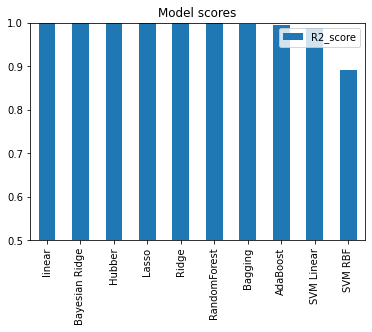

In [15]:
r2_score_calc(train, y)

,R2_score
linear,1.000000
Bayesian Ridge,1.000000
Hubber,1.000000
Ridge,1.000000
Lasso,0.999998
SVM Linear,0.982643
RandomForest,0.907631
SVM RBF,0.886025
Bagging,0.883436
AdaBoost,0.834650


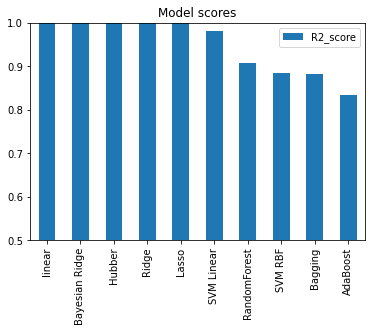

In [16]:
train = pca_data[:1460]
test = pca_data[1460:]

r2_score_calc(train, y)

In [17]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 2020)
parameters = {'alpha' : [100, 100, 10], 'epsilon' : [1.2, 1.25, 1.50], 'tol' : [1e-10]}

clf = linear_model.HuberRegressor(max_iter = 10000)
r2 = make_scorer(r2_score)
grid_obj = GridSearchCV(clf, parameters, cv = cv, scoring = r2)
grid_fit = grid_obj.fit(train, y)
best_clf = grid_fit.best_estimator_

best_clf.fit(train, y)

HuberRegressor(alpha=100, epsilon=1.5, max_iter=10000, tol=1e-10)

In [18]:
predictions_huber = best_clf.predict(test)
predictions_huber = np.exp(predictions_huber)
predictions_huber = predictions_huber.reshape(-1,)

sub = pd.DataFrame({ "Id": ids, "SalePrice": predictions_huber})
sub.to_csv("prices_submission.csv", index=False)

The idea is:

Feature reduction with PCA
Data transformation (log, hot encoding, nan)
Test different regression models
Things found:

Applying log transformation really increases the accuracy.
Using PCA with 36 components makes the learning and testing much (much much) faster.
Removing columns with more than 1000 NaNs gives better result than applying "mean" to them.
There are outliers. Instead of removing them, using Huber seems to provide a good result. Huber is a model robust to outliers.